#Exercices - TD1

**Notion de contraste**

In [6]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Définition des paramètres (acquisition 1)
taille_image = 256
intensite_fond = 50
intensite_roi = 150
diametre_roi = 100
rayon_roi = diametre_roi // 2

In [3]:
#Création de l'image (acquisition 1)
image = np.full((taille_image, taille_image), intensite_fond, dtype=np.uint8)

#Définition du centre du cercle
centre_x, centre_y = taille_image // 2, taille_image // 2

#Création d'un masque circulaire
Y, X = np.ogrid[:taille_image, :taille_image]
masque = (X - centre_x) ** 2 + (Y - centre_y) ** 2 <= rayon_roi ** 2
image[masque] = intensite_roi

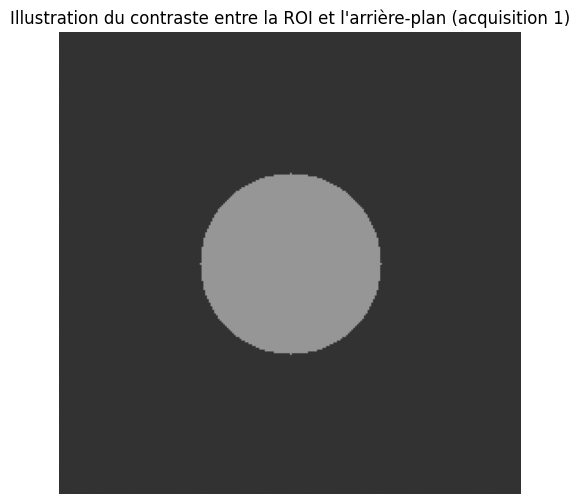

In [4]:
#Affichage de l'image (acquisition 1)
plt.figure(figsize=(10,6))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Illustration du contraste entre la ROI et l'arrière-plan (acquisition 1)")
plt.axis("off")
plt.show()

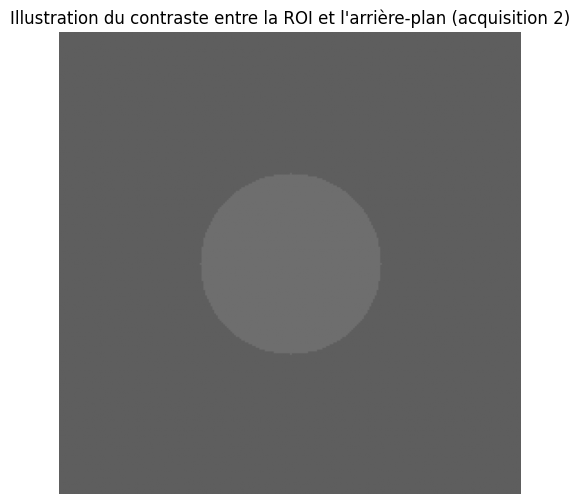

In [5]:
#Cas de l'acquisition 2
intensite_fond_2 = 94
intensite_roi_2 = 110
image2 = np.full((taille_image, taille_image), intensite_fond_2, dtype=np.uint8)
image2[masque] = intensite_roi_2

#Affichage de l'image (acquisition 2)
plt.figure(figsize=(10,6))
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.title("Illustration du contraste entre la ROI et l'arrière-plan (acquisition 2)")
plt.axis("off")
plt.show()

#Notion de résolution spatiale


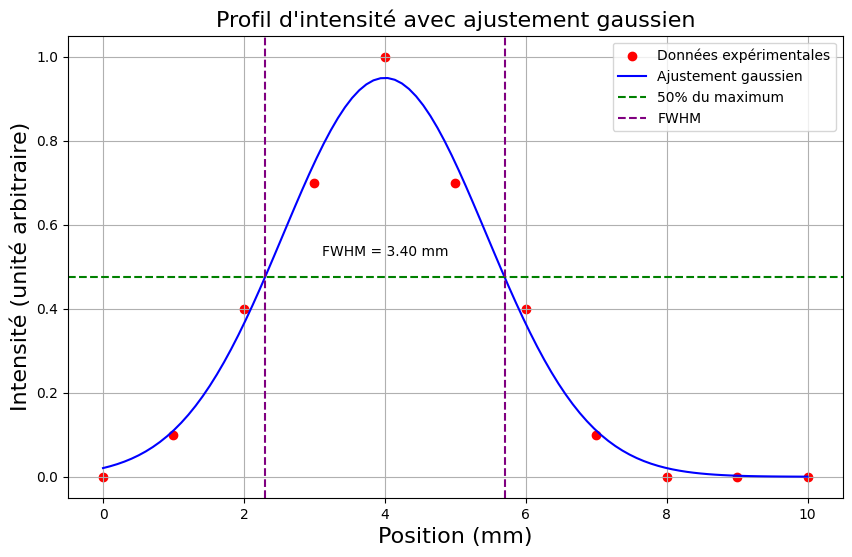

In [8]:
#Données du profil d'intensité
positions = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
intensites = np.array([0, 0.1, 0.4, 0.7, 1.0, 0.7, 0.4, 0.1, 0, 0, 0])

#Définition d'une fonction gaussienne
def gaussienne(x, A, x0, sigma):
  return A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

#Ajustement de la courbe
popt, pcov = curve_fit(gaussienne, positions, intensites, p0=[1, 5, 1])

#Extraction des paramètres ajustés
A_fit, x0_fit, sigma_fit = popt

#Calcul de la largeur à mi-hauteur
FWHM = 2.355 * sigma_fit

#Création de la courbe ajustée
x_fit = np.linspace(min(positions), max(positions), 100)
y_fit = gaussienne(x_fit, *popt)

#Affichage du graphique
plt.figure(figsize=(10,6))
plt.scatter(positions, intensites, color='red', label="Données expérimentales")
plt.plot(x_fit, y_fit, color='blue', label="Ajustement gaussien")
plt.axhline(y=A_fit/2, color='green', linestyle='--', label="50% du maximum")
plt.axvline(x=x0_fit - FWHM / 2, color='purple', linestyle='--', label="FWHM")
plt.axvline(x=x0_fit + FWHM / 2, color='purple', linestyle='--')
plt.text(x0_fit, A_fit / 2 + 0.05, f"FWHM = {FWHM:.2f} mm", color='black', ha='center')
plt.xlabel("Position (mm)", fontsize=16)
plt.ylabel("Intensité (unité arbitraire)", fontsize=16)
plt.title("Profil d'intensité avec ajustement gaussien", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

**Notion de bruit**

<ipython-input-9-3417038ac57c>:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 500 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image3[masque] = intensite_roi3


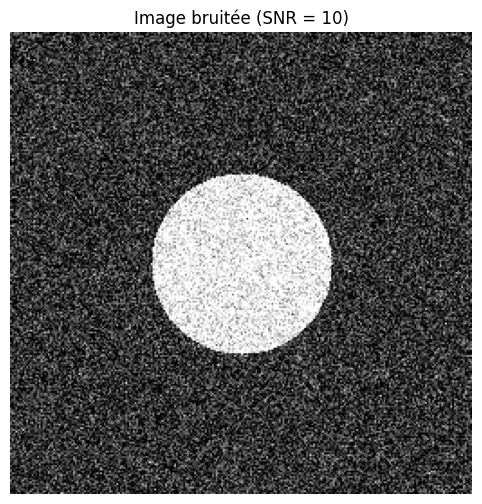

In [9]:
#Définition des paramètres
intensite_fond3 = 50
intensite_roi3 = 500
sigma_bruit3 = 50

#Création de l'image 3
image3 = np.full((taille_image, taille_image), intensite_fond3, dtype=np.uint8)
image3[masque] = intensite_roi3

#Ajout du bruit
bruit3 = np.random.normal(0, sigma_bruit3, image3.shape)
image_bruitee3 = image3 + bruit3

#Normalisation des valeurs (pour rester entre 0 et 255)
image_bruitee3 = np.clip(image_bruitee3, 0, 255).astype(np.uint8)

#Affichage de l'image 3
plt.figure(figsize=(10,6))
plt.imshow(image_bruitee3, cmap='gray', vmin=0, vmax=255)
plt.title("Image bruitée (SNR = 10)")
plt.axis("off")
plt.show()

<ipython-input-18-25813582b2e9>:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 500 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image4[masque] = intensite_roi4


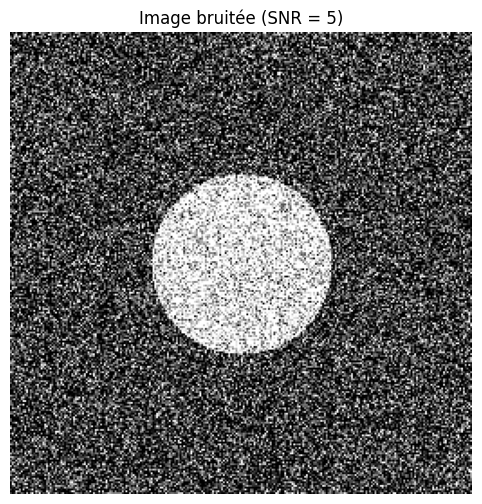

In [18]:
#Définition des paramètres
intensite_fond4 = 50
intensite_roi4 = 500
sigma_bruit4 = 100

#Création de l'image 3
image4 = np.full((taille_image, taille_image), intensite_fond4, dtype=np.uint8)
image4[masque] = intensite_roi4

#Ajout du bruit
bruit4 = np.random.normal(0, sigma_bruit4, image4.shape)
image_bruitee4 = image4 + bruit4

#Normalisation des valeurs (pour rester entre 0 et 255)
image_bruitee4 = np.clip(image_bruitee4, 0, 255).astype(np.uint8)

#Affichage de l'image 3
plt.figure(figsize=(10,6))
plt.imshow(image_bruitee4, cmap='gray', vmin=0, vmax=255)
plt.title("Image bruitée (SNR = 5)")
plt.axis("off")
plt.show()